In [71]:
for i in range(0,result.shape[0]-2):
    result.loc[result.index[i+2],'SMA_3'] = np.round(((result.iloc[i,1]+ result.iloc[i+1,1] +result.iloc[i+2,1])/3),1)

In [72]:
result.head()

Date    Price    SMA_3
0  30/07/2021  38745.6      NaN
1  29/07/2021  40001.4      NaN
2  28/07/2021  40003.2  39583.4
3  27/07/2021  39452.0  39818.9
4  26/07/2021  37276.6  38910.6

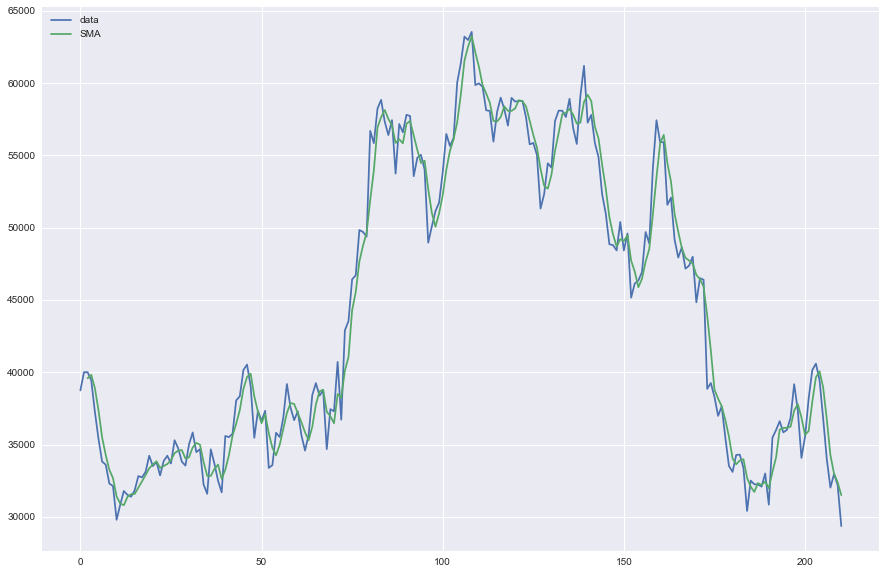

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(result['Price'],label='data')
plt.plot(result['SMA_3'],label='SMA')
plt.legend(loc=2)

In [75]:
result['CMA_4'] = result['Price'].expanding(min_periods=4).mean()
result.head()

Date    Price    SMA_3     CMA_4
0  30/07/2021  38745.6      NaN       NaN
1  29/07/2021  40001.4      NaN       NaN
2  28/07/2021  40003.2  39583.4       NaN
3  27/07/2021  39452.0  39818.9  39550.55
4  26/07/2021  37276.6  38910.6  39095.76

In [76]:
result['EMA'] = result.iloc[:,1].ewm(span=40,adjust=False).mean()
result.head()

Date    Price    SMA_3     CMA_4           EMA
0  30/07/2021  38745.6      NaN       NaN  38745.600000
1  29/07/2021  40001.4      NaN       NaN  38806.858537
2  28/07/2021  40003.2  39583.4       NaN  38865.216657
3  27/07/2021  39452.0  39818.9  39550.55  38893.840234
4  26/07/2021  37276.6  38910.6  39095.76  38814.950467

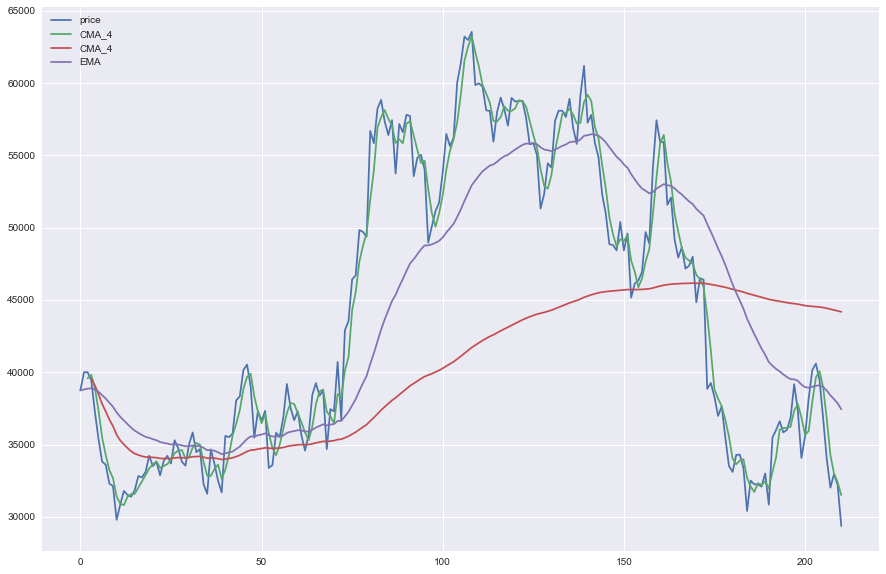

In [78]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(result['Price'],label='price')
plt.plot(result['SMA_3'],label='CMA_4')
plt.plot(result['CMA_4'],label='CMA_4')
plt.plot(result['EMA'],label='EMA')
plt.legend(loc=2)

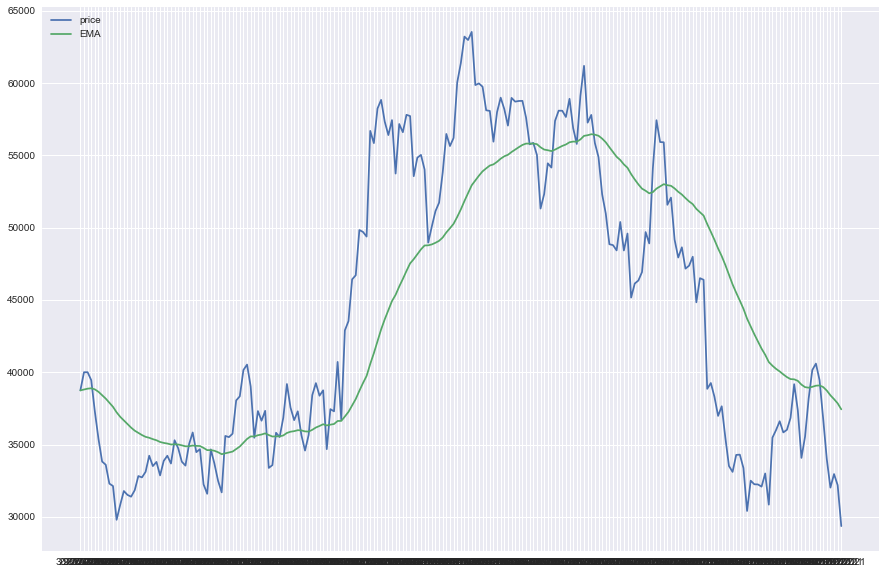

In [88]:
result.index = result.Date

plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(result['Price'],label='price')
plt.plot(result['EMA'],label='EMA')
plt.legend(loc=2)

# Put each cell of the following code into a Flask API - The visual willbe shown on a new tab of the browser

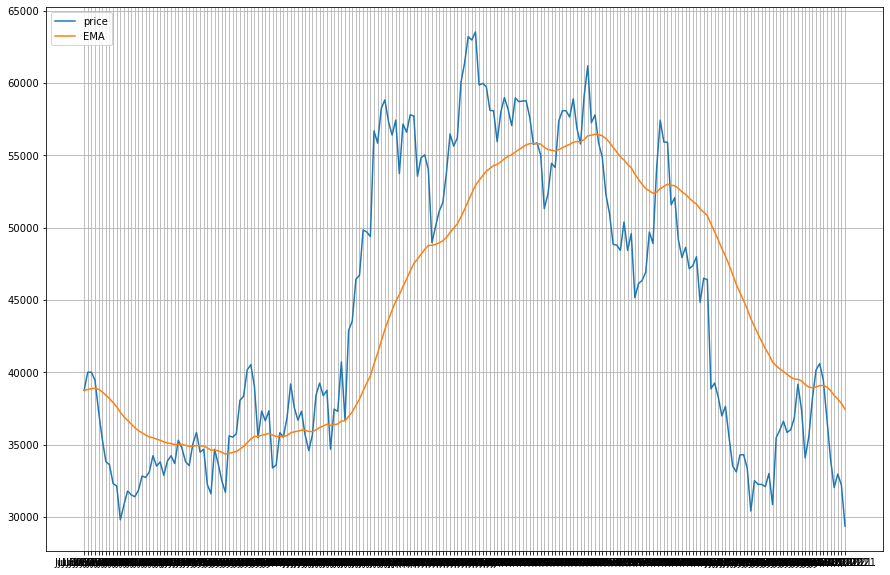

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

df_bitcoin = pd.read_csv('bitcoin.csv', encoding='utf-8')
df_b = df_bitcoin['Price']
df_b = df_b.str.replace(',', '').astype(float)
df_b.apply(pd.to_numeric)
result = pd.concat([df_bitcoin['Date'],df_b], axis=1)
result['EMA'] = result.iloc[:,1].ewm(span=40,adjust=False).mean()
result.index = result.Date

plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(result['Price'],label='price')
plt.plot(result['EMA'],label='EMA')
plt.legend(loc=2)

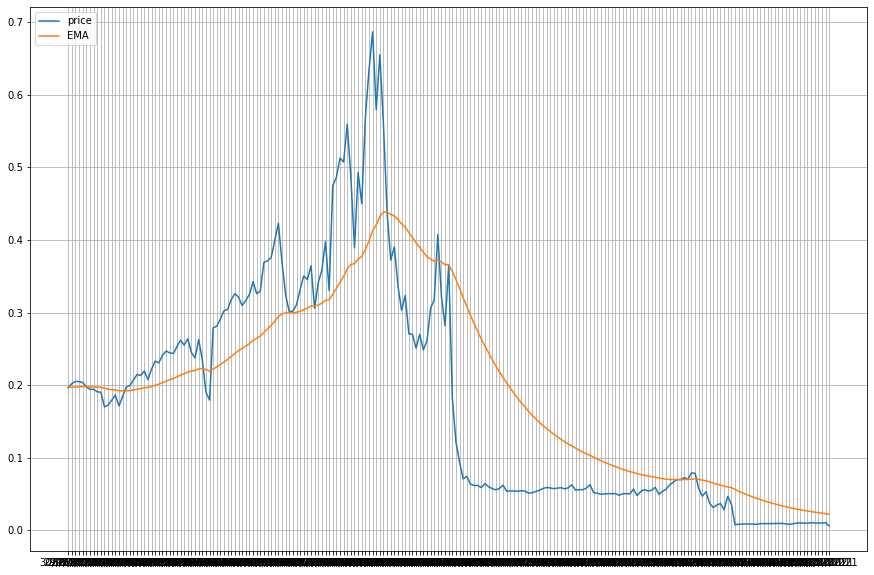

In [3]:
import pandas as pd 
df_dogcoin = pd.read_csv('dogecoin.csv', encoding='utf-8')
df_c = df_dogcoin['Price']

result = pd.concat([df_dogcoin['Date'],df_c], axis=1)
result['EMA'] = result.iloc[:,1].ewm(span=40,adjust=False).mean()
result.index = result.Date

plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(result['Price'],label='price')
plt.plot(result['EMA'],label='EMA')
plt.legend(loc=2)

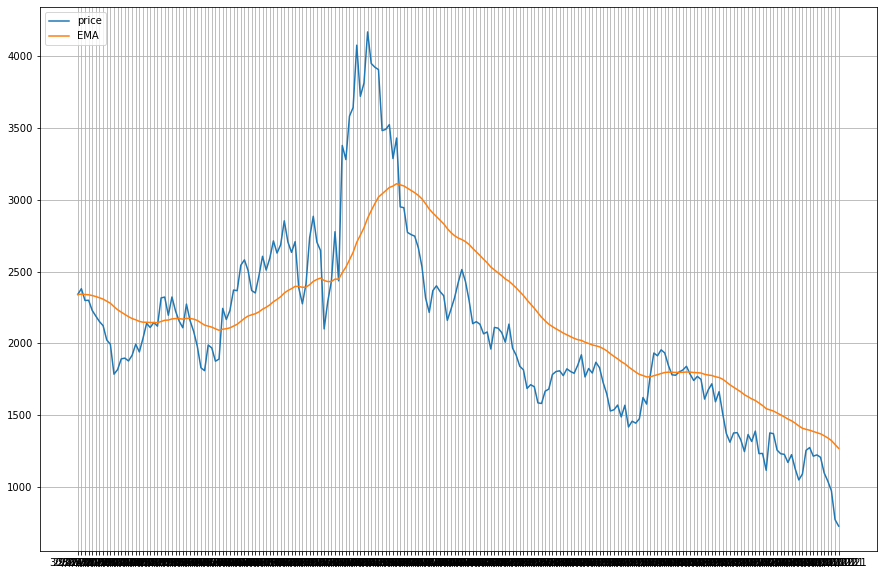

In [4]:
import pandas as pd 
df_ethereum = pd.read_csv('ethereum.csv', encoding='utf-8')
df_e = df_ethereum['Price']
df_e = df_e.str.replace(',', '').astype(float)
df_e.apply(pd.to_numeric)
result = pd.concat([df_ethereum['Date'],df_e], axis=1)
result['EMA'] = result.iloc[:,1].ewm(span=40,adjust=False).mean()
result.index = result.Date

plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(result['Price'],label='price')
plt.plot(result['EMA'],label='EMA')
plt.legend(loc=2)

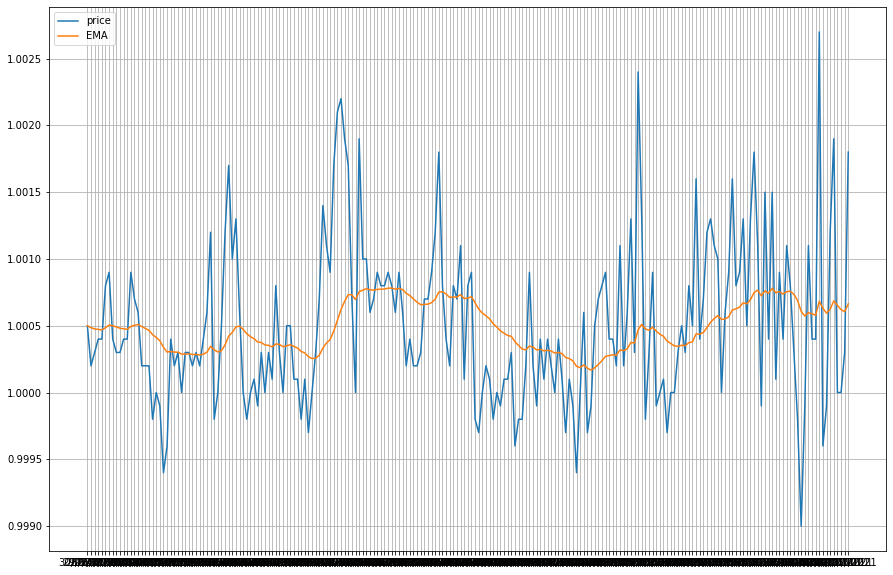

In [5]:
import pandas as pd 
df_usdt = pd.read_csv('Tether_USDT.csv', encoding='utf-8')
df_u = df_usdt['Price']

result = pd.concat([df_usdt['Date'],df_u], axis=1)
result['EMA'] = result.iloc[:,1].ewm(span=40,adjust=False).mean()
result.index = result.Date

plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(result['Price'],label='price')
plt.plot(result['EMA'],label='EMA')
plt.legend(loc=2)

In [102]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23914 sha256=6fa8a1c52a7ad4c56ea30452f099a722b6a6741e7c87a4c31c81e83cc4d93822
  Stored in directory: c:\users\apoor\appdata\local\pip\cache\wheels\fe\87\8b\7ec24486e001d3926537f5f7801f57a74d181be25b11157983
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8372 sha256=f45c62e47ef059362a315db2f2149655a3799b0933d92142578ade72e401a943
  Stored in directory: c:\users\apoor\appdata\local\pip\cache\wheels\ae\25\47\4d68431a7ec1b6c4b5233365934b74c1d4e665bf5f968d363a
Successfully built yfinance multitasking


In [104]:
# Raw Package
import numpy as np
import pandas as pd
#Data Source
import yfinance as yf
#Data viz
import plotly.graph_objs as go
 
#Importing market data
data = yf.download(tickers='BTC-USD',period = '8d', interval = '90m')
 
#Adding Moving average calculated field
data['MA5'] = data['Close'].rolling(5).mean()
data['MA20'] = data['Close'].rolling(20).mean()
 
#declare figure
fig = go.Figure()
 
#Candlestick
fig.add_trace(go.Candlestick(x=data.index,
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'], name = 'market data'))
 
#Add Moving average on the graph
fig.add_trace(go.Scatter(x=data.index, y= data['MA20'],line=dict(color='blue', width=1.5), name = 'Long Term MA'))
fig.add_trace(go.Scatter(x=data.index, y= data['MA5'],line=dict(color='orange', width=1.5), name = 'Short Term MA'))
 
#Updating X axis and graph
# X-Axes
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=3, label="3d", step="hour", stepmode="backward"),
            dict(count=5, label="5d", step="hour", stepmode="backward"),
            dict(count=7, label="WTD", step="hour", stepmode="todate"),
            dict(step="all")
        ])
    )
)
 
#Show
fig.show()

[*********************100%***********************]  1 of 1 completed


# Investor.com

In [120]:
import investpy

data = investpy.get_crypto_historical_data(crypto='bitcoin',
                                           from_date='01/01/2021',
                                           to_date='31/07/2021')

print(data.head())

               Open     High      Low    Close  Volume Currency
Date                                                           
2021-01-01  28951.7  29627.1  28712.4  29359.9  100902      USD
2021-01-02  29359.7  33233.5  29008.0  32193.3  240865      USD
2021-01-03  32192.9  34755.9  32029.6  32958.9  155210      USD
2021-01-04  33016.6  33587.5  28204.5  32022.6  255269      USD
2021-01-05  32015.4  34414.7  30010.5  33991.5  202128      USD


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 212 entries, 2021-01-01 to 2021-07-31
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Open      212 non-null    float64
 1   High      212 non-null    float64
 2   Low       212 non-null    float64
 3   Close     212 non-null    float64
 4   Volume    212 non-null    int64  
 5   Currency  212 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 11.6+ KB
None


In [8]:
data1 = investpy.get_index_historical_data(index='Nifty 50', country='India', from_date='01/01/2021', to_date='30/01/2021')
data1.head()

Open      High       Low     Close     Volume Currency
Date                                                                  
2021-01-01  13996.10  14049.85  13991.35  14018.50  258090000      INR
2021-01-04  14104.35  14147.95  13953.75  14132.90  495000000      INR
2021-01-05  14075.15  14215.60  14048.15  14199.50  492480000      INR
2021-01-06  14240.95  14244.15  14039.90  14146.25  632320000      INR
2021-01-07  14253.75  14256.25  14123.10  14137.35  559169984      INR

In [133]:
data2 = investpy.get_index_historical_data(index='s&p 500', country='United States', from_date='01/01/2021', to_date='30/07/2021')
data2.head()

Open     High      Low    Close  Volume Currency
Date                                                           
2021-01-04  3764.61  3769.99  3662.71  3700.65       0      USD
2021-01-05  3698.02  3737.83  3695.07  3726.86       0      USD
2021-01-06  3712.20  3783.04  3705.34  3748.14       0      USD
2021-01-07  3764.71  3811.55  3764.71  3803.79       0      USD
2021-01-08  3815.05  3826.69  3783.60  3824.68       0      USD

In [11]:
data3 = investpy.get_currency_cross_historical_data(currency_cross='EUR/USD', from_date='01/01/2021', to_date='31/01/2021')
data3.head()

Open    High     Low   Close Currency
Date                                               
2021-01-01  1.2216  1.2217  1.2210  1.2212      USD
2021-01-04  1.2231  1.2310  1.2223  1.2248      USD
2021-01-05  1.2247  1.2307  1.2246  1.2294      USD
2021-01-06  1.2296  1.2350  1.2265  1.2325      USD
2021-01-07  1.2327  1.2346  1.2244  1.2270      USD

In [21]:
training_data = data.drop(['Currency'], axis = 1)
training_data.head()

Open     High      Low    Close  Volume
Date                                                  
2021-01-01  28951.7  29627.1  28712.4  29359.9  100902
2021-01-02  29359.7  33233.5  29008.0  32193.3  240865
2021-01-03  32192.9  34755.9  32029.6  32958.9  155210
2021-01-04  33016.6  33587.5  28204.5  32022.6  255269
2021-01-05  32015.4  34414.7  30010.5  33991.5  202128

In [23]:
#MinMaxScaler is used to normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.        , 0.        , 0.01499867, 0.        , 0.15286868],
       [0.01179446, 0.10259766, 0.02372796, 0.08289401, 0.38710109],
       [0.09369661, 0.14590807, 0.1129581 , 0.10529241, 0.2437548 ],
       ...,
       [0.31964443, 0.31303893, 0.32886336, 0.31132793, 0.11001792],
       [0.31941606, 0.35951569, 0.29985235, 0.37574969, 0.14876853],
       [0.38302233, 0.36011027, 0.39691994, 0.36766332, 0.16097192]])

In [25]:
X_train = [] 
Y_train = []
training_data.shape[0]
for i in range(60, training_data.shape[0]):
     X_train.append(training_data[i-60:i])
     Y_train.append(training_data[i,0])
    

In [27]:
import numpy as np
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train.shape

(152, 60, 5)

In [30]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
#Initialize the RNN
model = Sequential() 
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
model.add(Dropout(0.2)) 
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3)) 
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4)) 
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5)) 
model.add(Dense(units =1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            11200     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [32]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history = model.fit(X_train, Y_train, epochs = 10, batch_size =50, validation_split=0.1)

Epoch 1/10
3/3 [==============================] - 15s 1s/step - loss: 0.3431 - val_loss: 0.0262
Epoch 2/10
3/3 [==============================] - 1s 299ms/step - loss: 0.2292 - val_loss: 0.0128
Epoch 3/10
3/3 [==============================] - 1s 297ms/step - loss: 0.1197 - val_loss: 0.0318
Epoch 4/10
3/3 [==============================] - 1s 309ms/step - loss: 0.0753 - val_loss: 0.0139
Epoch 5/10
3/3 [==============================] - 1s 297ms/step - loss: 0.0844 - val_loss: 0.0128
Epoch 6/10
3/3 [==============================] - 1s 301ms/step - loss: 0.0971 - val_loss: 0.0134
Epoch 7/10
3/3 [==============================] - 1s 270ms/step - loss: 0.0899 - val_loss: 0.0173
Epoch 8/10
3/3 [==============================] - 1s 278ms/step - loss: 0.0582 - val_loss: 0.0292
Epoch 9/10
3/3 [==============================] - 1s 304ms/step - loss: 0.0704 - val_loss: 0.0361
Epoch 10/10
3/3 [==============================] - 1s 254ms/step - loss: 0.0608 - val_loss: 0.0274


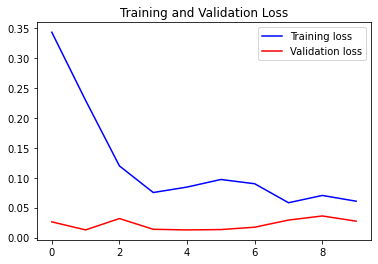

In [34]:
%matplotlib inline
from matplotlib import pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [36]:
part_60_days = data.tail(60)
df= part_60_days.append(data, ignore_index = True)
df = df.drop(['Currency'], axis = 1)
df.head()

Open     High      Low    Close  Volume
0  36687.7  38199.9  35981.1  37555.8   96889
1  37555.7  39462.3  37193.6  39187.3  106442
2  39191.4  39255.4  35659.9  36851.3  127708
3  36841.2  37887.6  34832.0  35520.0  101475
4  35518.7  36434.0  35265.3  35815.4   62199

In [38]:
inputs = scaler.transform(df) 
inputs

array([[0.22363229, 0.24388565, 0.22964888, 0.23977941, 0.1461528 ],
       [0.24872443, 0.27979938, 0.26545492, 0.28751061, 0.16214004],
       [0.29600925, 0.27391333, 0.2201636 , 0.21916854, 0.19772935],
       ...,
       [0.31964443, 0.31303893, 0.32886336, 0.31132793, 0.11001792],
       [0.31941606, 0.35951569, 0.29985235, 0.37574969, 0.14876853],
       [0.38302233, 0.36011027, 0.39691994, 0.36766332, 0.16097192]])

In [104]:
X_test = []
Y_test = []
for i in range (60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    Y_test.append(inputs[i, 0])

In [105]:
    X_test, Y_test = np.array(X_test), np.array(Y_test) #X_test.shape, Y_test.shape
    Y_pred = model.predict(X_test)

In [106]:
scaler.scale_

array([2.89080003e-05, 2.84487737e-05, 2.95307563e-05, 2.92560194e-05,
       1.67353093e-06])

In [107]:
scale = 1/5.18164146e-05
Y_test = Y_test*scale 
Y_pred = Y_pred*scale
Y_pred

array([[ 5408.9575],
       [ 5460.251 ],
       [ 5515.341 ],
       [ 5569.385 ],
       [ 5618.354 ],
       [ 5659.559 ],
       [ 5692.7793],
       [ 5720.1875],
       [ 5745.0195],
       [ 5770.4863],
       [ 5798.629 ],
       [ 5829.1313],
       [ 5860.42  ],
       [ 5890.842 ],
       [ 5920.3057],
       [ 5948.816 ],
       [ 5975.962 ],
       [ 6000.919 ],
       [ 6023.0693],
       [ 6042.2593],
       [ 6058.226 ],
       [ 6069.9995],
       [ 6075.695 ],
       [ 6074.0737],
       [ 6064.2954],
       [ 6046.493 ],
       [ 6021.0713],
       [ 5988.5923],
       [ 5949.8174],
       [ 5907.2563],
       [ 5863.107 ],
       [ 5818.8584],
       [ 5775.537 ],
       [ 5734.3877],
       [ 5697.3364],
       [ 5666.6143],
       [ 5644.013 ],
       [ 5631.585 ],
       [ 5630.4336],
       [ 5642.5796],
       [ 5671.749 ],
       [ 5720.4546],
       [ 5789.7705],
       [ 5880.2983],
       [ 5991.262 ],
       [ 6121.327 ],
       [ 6268.51  ],
       [ 6430

In [108]:
Y_test

array([    0.        ,   227.62022824,  1808.24187201,  2267.77810241,
        1709.21591487,  2816.01927469,  4377.67256611,  5866.07454387,
        6502.5185546 ,  6247.2826369 ,  5156.9371122 ,  3611.96481301,
        2850.55283383,  4703.98401586,  5703.89513125,  4351.61897625,
        3943.40887575,  3841.92819066,  4284.00237904,  3855.26182658,
        3637.79524577,  1052.74355562,  2255.22551629,  1749.99787243,
        1836.91755762,  1836.80597908,  1979.34756809,   812.96126616,
        2471.46473312,  2983.77761448,  2973.5123885 ,  2318.10002541,
        2545.27393948,  3645.94047943,  4852.10453203,  4476.92168033,
        5215.68321523,  5733.57502375,  5524.19788733,  9732.27106769,
        9794.42031628,  8861.06580195, 10624.11836393, 10277.16488368,
       10165.02844771, 10967.83606643, 10590.19848678, 11274.78863893,
       12911.19955432, 12629.79846823, 15046.53392588, 15038.50027077,
       15892.07612668, 14037.91968412, 11135.20388132, 11573.03808505,
      

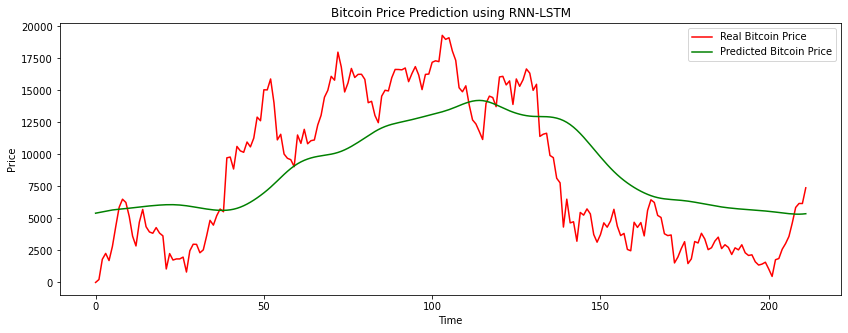

In [109]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [119]:
import numpy as np
import investpy
from sklearn.preprocessing import MinMaxScaler

data1 = investpy.get_crypto_historical_data(crypto='dogecoin',
                                           from_date='01/01/2021',
                                           to_date='31/07/2021')

training_data = data.drop(['Currency'], axis = 1)

#MinMaxScaler is used to normalize the data
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)

X_train = [] 
Y_train = []
training_data.shape[0]
for i in range(60, training_data.shape[0]):
     X_train.append(training_data[i-60:i])
     Y_train.append(training_data[i,0])

X_train, Y_train = np.array(X_train), np.array(Y_train)

In [112]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
#Initialize the RNN
model = Sequential() 
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
model.add(Dropout(0.2)) 
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3)) 
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4)) 
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5)) 
model.add(Dense(units =1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 60, 50)            11200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 60, 60)            26640     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 120)              

In [113]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history = model.fit(X_train, Y_train, epochs = 10, batch_size =50, validation_split=0.1)

Epoch 1/10
3/3 [==============================] - 9s 790ms/step - loss: 0.1663 - val_loss: 0.0499
Epoch 2/10
3/3 [==============================] - 1s 273ms/step - loss: 0.1146 - val_loss: 0.0094
Epoch 3/10
3/3 [==============================] - 1s 279ms/step - loss: 0.0534 - val_loss: 0.0153
Epoch 4/10
3/3 [==============================] - 1s 281ms/step - loss: 0.0518 - val_loss: 0.0011
Epoch 5/10
3/3 [==============================] - 1s 279ms/step - loss: 0.0398 - val_loss: 0.0028
Epoch 6/10
3/3 [==============================] - 1s 279ms/step - loss: 0.0418 - val_loss: 8.0411e-04
Epoch 7/10
3/3 [==============================] - 1s 278ms/step - loss: 0.0309 - val_loss: 0.0040
Epoch 8/10
3/3 [==============================] - 1s 278ms/step - loss: 0.0366 - val_loss: 0.0100
Epoch 9/10
3/3 [==============================] - 1s 281ms/step - loss: 0.0317 - val_loss: 0.0031
Epoch 10/10
3/3 [==============================] - 1s 282ms/step - loss: 0.0344 - val_loss: 7.2626e-04


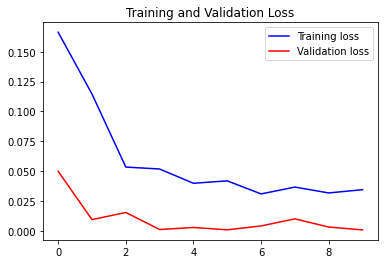

In [114]:
%matplotlib inline
from matplotlib import pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [115]:
part_60_days = data.tail(60)
df= part_60_days.append(data, ignore_index = True)
df = df.drop(['Currency'], axis = 1)
inputs = scaler.transform(df) 

In [116]:
X_test = []
Y_test = []
for i in range (60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    Y_test.append(inputs[i, 0])

In [117]:
    X_test, Y_test = np.array(X_test), np.array(Y_test) #X_test.shape, Y_test.shape
    Y_pred = model.predict(X_test)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()
rspine = ax2.spines['right']
rspine.set_position(('axes', 1.15))
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
fig.subplots_adjust(right=0.7)

Y_test.plot(ax=ax1, style='b-')
Y_pred.plot(ax=ax2, style='r-')


# legend
ax2.legend([ax1.get_lines()[0],
            ax1.right_ax.get_lines()[0],
            ax2.get_lines()[0]],
           ['BTC','DOG','USD'])

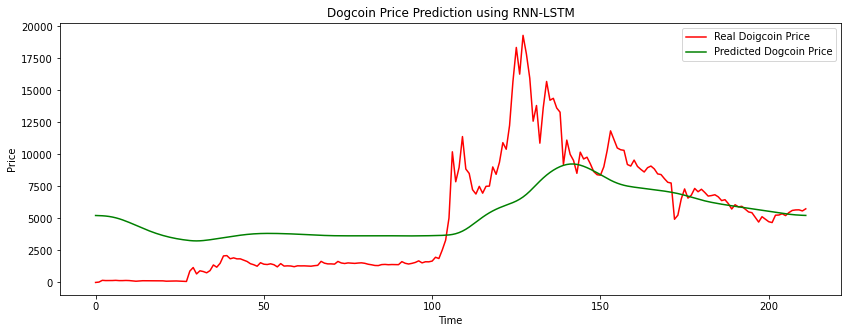

In [118]:
#scaler.scale_
scale = 1/5.18164146e-05
Y_test = Y_test*scale 
Y_pred = Y_pred*scale
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Doigcoin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Dogcoin Price')
plt.title('Dogcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [141]:
df = pd.DataFrame({'BTC': data.Close,
                   'DOG': data1.Close,
                   'USD':data3.Close})
df.head()

BTC       DOG     USD
Date                                 
2021-01-01  29359.9  0.005661  1.2212
2021-01-02  32193.3  0.010489     NaN
2021-01-03  32958.9  0.009850     NaN
2021-01-04  32022.6  0.009780  1.2248
2021-01-05  33991.5  0.009958  1.2294

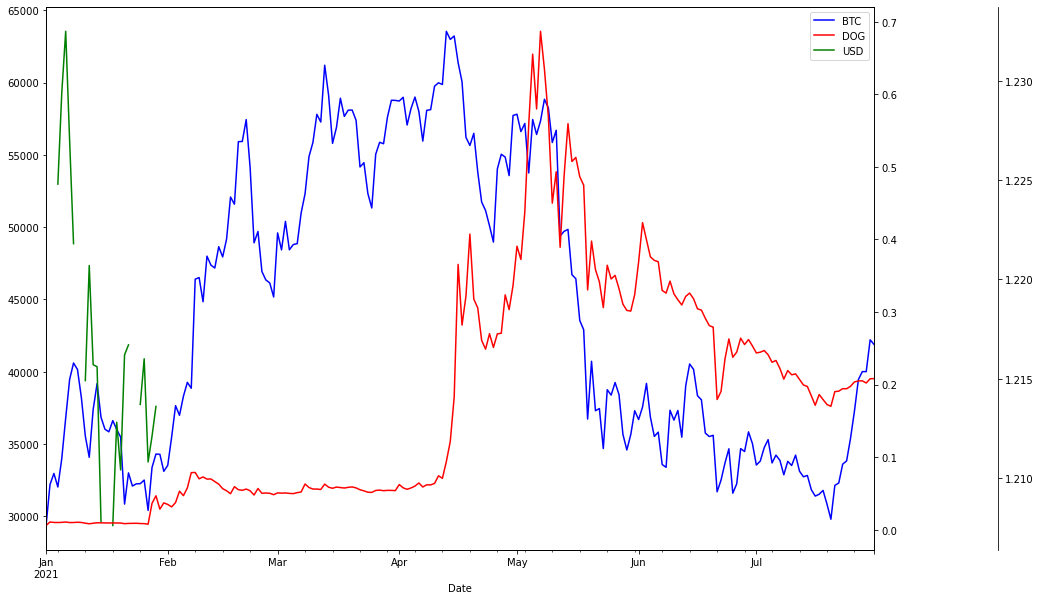

In [143]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()
rspine = ax2.spines['right']
rspine.set_position(('axes', 1.15))
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
fig.subplots_adjust(right=0.7)

#df['BTC'].plot(ax=ax1, style='b-')
#df['DOG'].plot(ax=ax2, style='g-')
df['BTC'].plot(ax=ax1, style='b-')
df['DOG'].plot(ax=ax1, style='r-', secondary_y=True)
df['USD'].plot(ax=ax2, style='g-')


# legend
ax2.legend([ax1.get_lines()[0],
            ax1.right_ax.get_lines()[0],
            ax2.get_lines()[0]],
           ['BTC','DOG','USD'])

<AxesSubplot:>

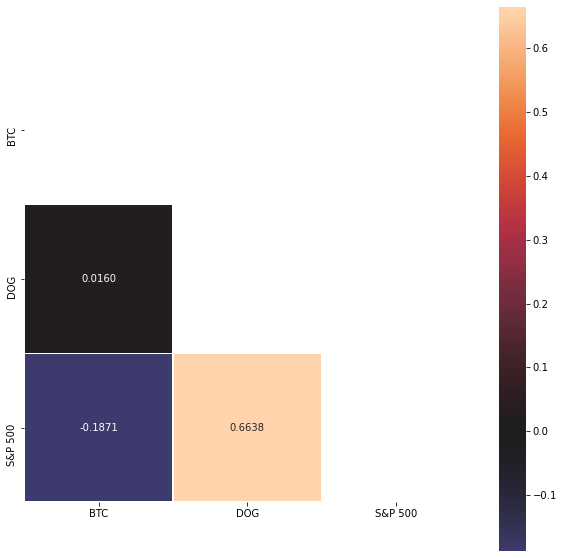

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt = '.4f', mask=mask, center=0, square=True, linewidths=.5)

In [137]:
df_return = df.apply(lambda x: x / x[0])
df_return.head()

BTC       DOG  S&P 500
Date                                   
2021-01-01  1.000000  1.000000      NaN
2021-01-02  1.096506  1.852853      NaN
2021-01-03  1.122582  1.739975      NaN
2021-01-04  1.090692  1.727610      NaN
2021-01-05  1.157753  1.759053      NaN

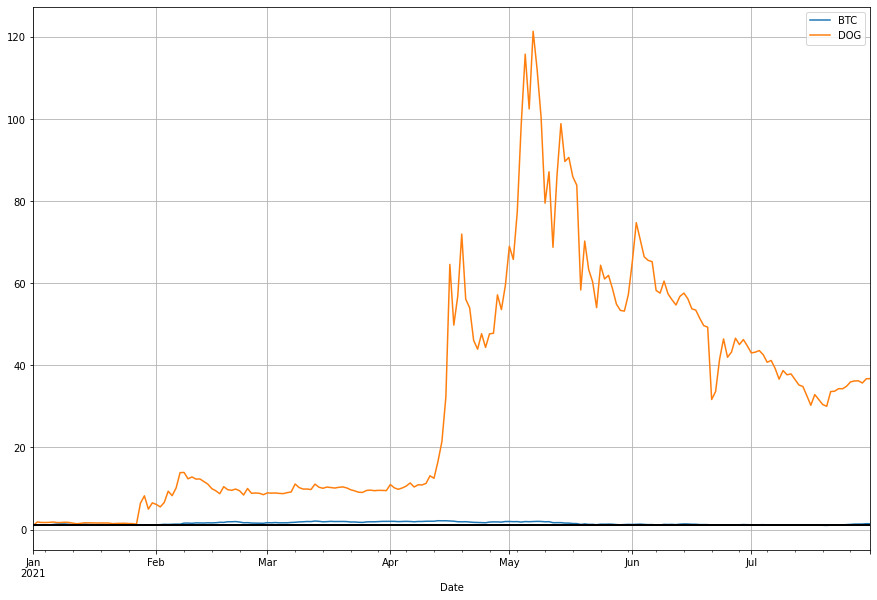

In [126]:
df_return.plot(grid=True, figsize=(15, 10)).axhline(y = 1, color = "black", lw = 2)

BTC          DOG  S&P 500
Date                                        
2021-07-31  142.637066  3676.859212      NaN

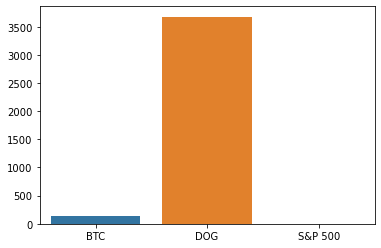

In [138]:
df_perc = df_return.tail(1) * 100
ax = sns.barplot(data=df_perc)
df_perc

BTC            DOG  S&P 500
Date                                       
2021-01-01  0.03406  176647.235471      NaN

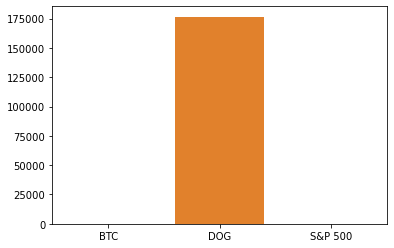

In [139]:
budget = 1000 # USD
df_coins = budget/df.head(1)

ax = sns.barplot(data=df_coins)
df_coins

BTC           DOG  S&P 500
Date                                          
2021-07-31  1426.370662  36768.592122      NaN

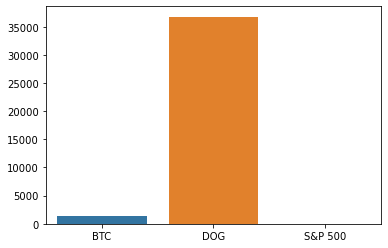

In [140]:
df_profit = df_return.tail(1) * budget

ax = sns.barplot(data=df_profit)
df_profit